In [28]:
import cv2  #berfungsi untuk mengimport library openCV yang akan digunakan dalam pengolahan gambar
import matplotlib.pyplot as plt #berfungsi untuk mengimport library matplotlib 
                                #agar bisa digunakan dalam program untuk menampilkan gambar, membuat histogram dan lainnya
import matplotlib.image as img 
import numpy as nmp     # berfungsi untuk mengimport library numpy yaitu sebuah library yang sangat membantu dalam melakukan proses
                        # perhitungan, diantaranya adalah yang berkaitan dengan matriks

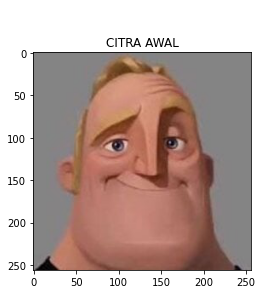

In [29]:
# Citra Asli
# membaca/memanggil dan menampilkan gambar
image=img.imread("modul2.jpg")  # baris code ini digunakan untuk memanggil/membaca sebuah citra atau gambar dan disimpan dalam
                                # sebuah variabel(image)
plt.title("\n\nCITRA AWAL") # baris code ini digunakan untuk memberikan judul pada gambar yang akan ditampilkan nanti
plt.imshow(image) #baris code untuk menampilkan gambar yang tersimpan dalam variabel image

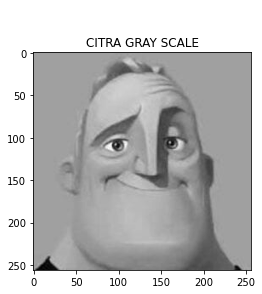

In [30]:
# Citra grey
# melakukan proses greying terhadap image dan menampilkannya
greyImage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # merubah warna pada gambar yang semula RGB menjadi gray scale
plt.title("\n\nCITRA GRAY SCALE") # baris code ini digunakan untuk memberikan judul pada gambar yang akan ditampilkan nanti
plt.imshow(greyImage,cmap="gray") # baris code untuk menampilkan gambar yang tersimpan dalam variabel greyImage

In [31]:
# Fungsi Translasi
# Fungsi yang digunakan untuk menggeser sebuah image searah X dan Y
def translation (image, X,Y):
    newImage=nmp.zeros(image.shape) # membuat sebuah numpy array dengan nilai nol yang ukurannya sama dengan ukuran gambar
                                    # yang akan digeser, berfungsi untuk menyimpan gambar yang telah digeser searah X
    newImage2=nmp.zeros(image.shape)  # membuat sebuah numpy array dengan nilai nol yang ukurannya sama dengan ukuran gambar
                                    # yang akan digeser , berfungsi untuk menyimpan gambar yang telah digeser searah X dan Y
    n=Y # menyimpan Y dalam n yang akan digunakan untuk membatasi jumlah perulangan yang akan dilakukan
    m=X # begitu juga dengan baris code yang ini
    
    # (if) di bawah ini digunakan untuk memutlakkan nilai pada m dan n agar selalu bernilai positif
    
    if X<0 :
        m=-X
    if Y<0 :
        n=-Y
    #perulangan untuk melakukan pergeseran pada sumbu X (kiri kanan)
    
    for i in range (image.shape[0]) : # perulangan sebanyak baris pixel pda gambar yang akan digeser
        for j in range (image.shape[1]-m) : # perulangan sebanyak kolom pada pixel - m agar tidak perulangan tidak melebihi ukuran wadah
            
            # kontrol untuk menggeser posisi pixel yaitu jika X lebih kecil dari 0 pixel akan digeser ke kiri
            if X<0 :
                newImage[i][j]=image[i][j-X] 
            # dan jika X lebih besar dari 0 maka gambar akan digeser ke kanan
            else :
                newImage[i][j+X]=image[i][j]
    #pergeseran untuk melakukan pergeseran pada sumbu Y (bawah atas)
    
    for i in range (image.shape[0]-n) : # perulangan sebanyak baris pixel -n agar perulangan tidak melebihi wadah yang disiapkan
        for j in range (image.shape[1]) : # perulangan sebanyak kolom pada gambar yang akan digeser
            # kontrol untuk menggeser posisi pixel yaitu jika Y lebih kecil dari 0 pixel akan digeser ke atas
            if Y<0 :
                newImage2[i][j]=newImage[i-Y][j] 
            # dan jika Y lebih besar dari 0 maka gambar akan digeser ke bawah
            else :
                newImage2[i+Y][j]=newImage[i][j]
    plt.title("\n\nTRANSLASI") # baris code untuk memberikan judul pada gambar yang akan ditampilkan
    plt.imshow(newImage2,cmap="gray") # baris code untuk menampilkan gambar yang sudah digeser

In [32]:
#Revisi Fungsi translasi //cara lain
def translasi(image, x,y): 
    row,col=image.shape #mengambil ukuran image dan menyimpannya dalam variabel row dan col
    newImage=nmp.zeros(image.shape) #membuat sebuah numpy array nol dengan ukuran sesuai gambar yang akan ditranslasi
                                    #bertujuan untuk menampung hasil translasi
    
    for i in range(row):   #melakukan perulangan sebanyak baris pada image
        for j in range(col):   #melakukan perulangan sebanyak kolom pada image
                # kedua perulangan bertujuan untuk mengunjungi semua pixel pada image
                
            if(0<= i-y<row) and (0<=j+x<col): #memastikan indeks pixel yang diambil dan diletakkan pada indeks tertentu tidak melebihi indeks yang tersedia          
                newImage[i][j+x]=image[i-y][j] #menyimpan hasil translasi per pixel
            else:
                continue
    plt.title("\n\nTRANSLASI") # baris code untuk memberikan judul pada gambar yang akan ditampilkan
    plt.imshow(newImage,cmap="gray") # baris code untuk menampilkan gambar yang sudah digeser

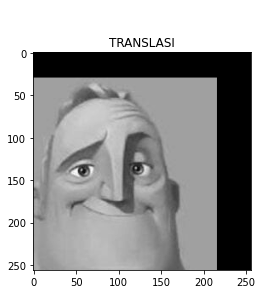

In [33]:
translasi(greyImage,-40,30)

In [34]:
# Fungsi Rotasi
#fungsi untuk melakukan rotasi pada image dengan derajat rotasi sesuai keinginan
def rotasi(degree,image): # deklarasi fungsi
    newImage = nmp.zeros((image.shape[0],image.shape[1]))   # untuk membuat sebuah numpy array nol 
                                                            # dengan ukuran sesuai dengan ukuran image yang akan dirotasi
                                                            # tempat menyimpan citra baru hasil rotasi
    angle = -degree*(nmp.pi/180)  
    
    # menentukan pusat rotasi yaitu pertengahan dari gambar
    center_x = image.shape[0] // 2 # mengambil nilai setengah tinggi(baris)
    center_y = image.shape[1] // 2 # mengambil nilai setengah panjang(kolom)

    # perulangan untuk mengunjungi semua pixel dan menentukan posisi baru dari pixel setelah dirotasi 
    for i in range(image.shape[0]): #perulangan sebanyak baris pixel pada image
        for j in range(image.shape[1]): # perulangan sebanyak kolom pixel pada image
            x2 = int((i - center_x) * nmp.cos(angle) - (j - center_y) * nmp.sin(angle) + center_x) # menentukan indeks x baru sebagai posisi baru dari pixel
            y2 = int((i - center_x) * nmp.sin(angle) + (j - center_y) * nmp.cos(angle) + center_x) # menentukan indeks y baru sebagai posisi baru dari pixel
            if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]: # statement kontrol agar indeks tidak melebihi wadah yang ada
                newImage[i][j] = image[x2][y2] # menyimpan pixel ke dalam wadah(numpy array) yang disiapkan
    plt.title("\n\nROTASI ") # memberikan judul pada gambar yang akan ditampilkan
    plt.imshow(newImage, cmap="gray") # menampilkan gambar

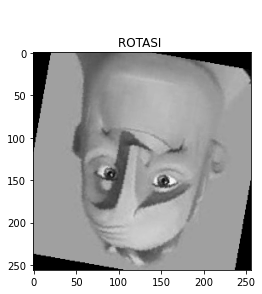

In [35]:
rotasi(170,greyImage) # memanggil function rotasi yang telah dideklarasikan di atas

In [36]:
# Refleksi terhadap sumbu X
#Function untuk melakukan pencerminan pada image dengan parameter image
def pencerminanX(image):
    newImage=nmp.zeros(image.shape) # membuat sebuah numpy array yang ukurannya sama dengan gambar yang akan di cerminkan
    k=image.shape[0]-1 # mengambil indek baris terakhir pada gambar yang akan digeserr
    #perulangan untuk mengunjungi semua pixel pada image 
    for i in range (image.shape[0]): #perulangan sebanyak baris
        for j in range (image.shape[1]): #perulangan sebanyak kolom
            newImage[i][j]=image[k][j] # menyimpan nilai pixel yang bawah ke atas, i akan mulai dari 0 dan bertambah setiap perulangan baris
                                       # sedangkan k akan dimulai dari indeks baris terakhir dan berkurang 1 setiap perulangan baris
                                       # sehingga pada image terjadi refleksi terhadap sumbu X atau sumbu horizontal
        k-=1 # k akan berurang 1 setiap perulangan baris
    plt.title("\n\nPENCERMINAN SUMBU X") # memberi judul pada gambar yang akan ditampilkan
    plt.imshow(newImage,cmap="gray") # menampilkan gambar

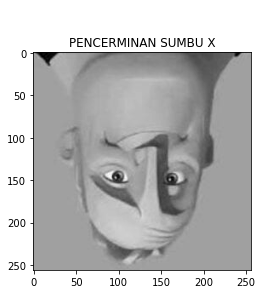

In [37]:
pencerminanX(greyImage) #memanggil function pencerminanX dengan input greyImage

In [38]:
# Refleksi terhadap sumbu y
#Function yang digunakan untuk melakukan pencerminan terhadap sumbu Y atau sumbu vertikal
def pencerminanY(image):
    newImage=nmp.zeros(image.shape) # Membuat sebuah numpy array yang seukuran dengan gambar yang akan di refleksi 
                                    # dan bertujuan sebagai wadah untuk menyimpan hasil refleksi
    k=image.shape[1]-1 # mengambil dan menyimpan indeks terakhir dari baris pada image yang akan direfleksikan
    
    #perualangan berikut untuk mengunjungi setiap pixel pada image
    for j in range (image.shape[1]): # perulangan sebanyak kolom pada image
        for i in range (image.shape[0]): # perulangan sebanyak baris pada image
            newImage[i][j]=image[i][k] # menyimpan nilai pixel yang paling kanan ke kiri, j akan mulai dari 0 dan bertambah setiap perulangan kolom
                                       # sedangkan k akan dimulai dari indeks kolom terakhir dan berkurang 1 setiap perulangan kolom
                                       # sehingga pada image terjadi refleksi terhadap sumbu Y atau sumbu horizontal
        k-=1 # nilai k berkurang 1 setiap perulangan kolom 
    plt.title("\n\nPENCERMINAN SUMBU Y") #memberi judul pada image yang akan ditampilkan
    plt.imshow(newImage,cmap="gray") #menampilkan image

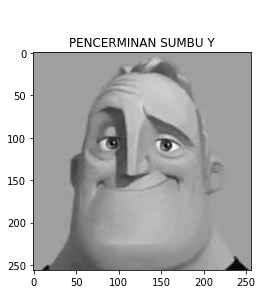

In [39]:
pencerminanY(greyImage) #memanggil function pencerminanY dengan input greyImage

In [40]:
# function untuk melakukan dilatasi pada sebuah image dengan skala tertentu(sesuai keinginan)
def dilatasi (image, skala) : 
    newImage=nmp.zeros((2*image.shape[0],2*image.shape[1])) # membuat sebuah numpy array sebagai wadah untuk menampilkan hasil perbesaran
                                                            # dengan ukuran wadah 2 kali ukuran awal
        # perulangan berikut untuk mengunjungi setiap pixel pada wadah dan akan diisi dengan nilai tertentu
    for i in range(newImage.shape[0]): #perulangan sebanyak baris wadah
        for j in range(newImage.shape[1]): #perulangan sebanyak kolom wadah
            newImage[i][j]=image[int(i/skala)][int(j/skala)] # memberikan nilai baru yang diambil dari image yang akan didilatasi
                                                             # nilai tersebut tergantung skala yang di tentukan
                                                             # jika skala 2 maka 1 pixel pada image awal akan disebar ke 4 pixel pada wadah
                                                             # jika 3 maka 1 akan disebar ke 9 pixel dst
    plt.title("\n\nDILATASI") #bertujuan untuk memberikan judul pada gambar yang akan ditampilkan
    plt.imshow(newImage, cmap="gray") #menampilkan gambar hasil dilatasi

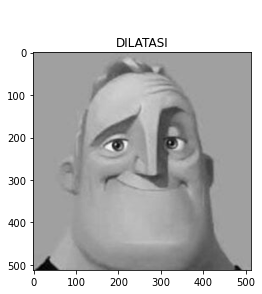

In [41]:
dilatasi(greyImage,2)

In [42]:
# citra Negatif
# function untuk membuat citra negatif dari sebuah image
def citraNegatif(image): 
    newImage=nmp.zeros(image.shape,int) #membuat sebuah numpy array dengan ukuran yang sama dengan image untuk menyimpan citra negatif
    #perulangan untuk mengunjungi setiap pixel pada image
    for j in range (image.shape[1]):  #perulangan sebanyak kolom
        for i in range (image.shape[0]): #perulangan sebanyak baris
            newImage[i][j]=255-image[i][j] # membuat dan menyimpan citra negatif dari image pada wadah dengan posisi yang bersesuaian
    plt.title("\n\nCITRA NEGATIF") # memberikan judul pada gambar yang akan ditampilkan
    plt.imshow(newImage,cmap="gray") # menampilkan hasil citra negatif
    return newImage #mengembalikan nilai citra Negatif

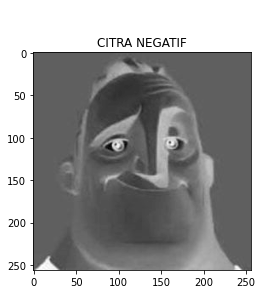

In [43]:
negatifImage=citraNegatif(greyImage) #memanggil function citraNegatif dengan input greyImage dan outputnya disimpan dalam
# variabel negatifImage

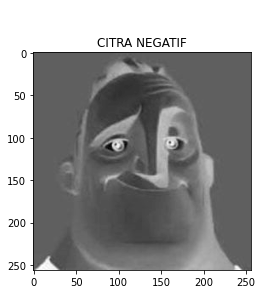

In [44]:
#revisi // cara lain
negatif_citra=255-greyImage
plt.title("\n\nCITRA NEGATIF") # memberikan judul pada gambar yang akan ditampilkan
plt.imshow(negatif_citra,cmap="gray") # menampilkan hasil citra negatif

In [45]:
#fungsi ini berfungsi untuk menghitung nilai dari masing-masing keabuan, n(total fixel) 
#ni(jumlah kemunculan tiap fixel), dan hi(peluang kemunculan tiap piksel)
def  keabuan_ni(imge):
    keabuan=nmp.arange(imge.max()+1) # membuat array dari 0 sampai dengan nilai maksimal pada image
    ni=nmp.zeros(imge.max()+1) #membuat array dari 0 sampai dengan nilai maksimal pada image
    
    #perulangan berikut untuk menghitung semua kemunculan piksel untuk tiap derajat keabuan
    for px in imge:
        for i in px:
            ni[i]=ni[i]+1
            
    return keabuan,ni #fungsi ini akan mengembalikan nilai keabuan, n, ni,hi

In [46]:
#memanggil function kebauan_ni untuk mendapatkan nilai keabuan dan frekuensinya untuk masing-masing greyImage dan negatifCitra
keabuan1,ni1 = keabuan_ni(greyImage) 
keabuan2,ni2 = keabuan_ni(negatifImage)

In [47]:
# fungsi untuk membuat histogram dengan parameter keabuan dan kemunculan 
def Histogram_Jumlah(keabuan,kemunculan,title):
    plt.xlabel("intensity value") # membuat label pada sumbu x pada histogram yang akan dibuat
    plt.ylabel("Frequency") # membuat label pada sumbu y pada histogram yang akan dibuat
    plt.title(title) # memberikan judul
    plt.bar(keabuan, kemunculan)  # membuat histogram dengan data berupa keabuan dan jumlah kemunculannya
    plt.show() #menampilkan histogram

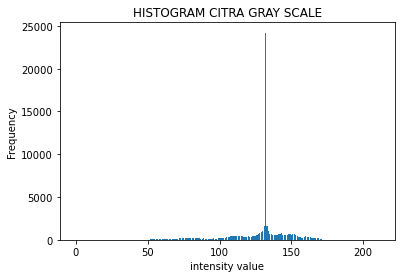

In [48]:
Histogram_Jumlah(keabuan1,ni1,"HISTOGRAM CITRA GRAY SCALE") #memanggil function Histogram_Jumlah untuk membuat histogram
# dengan input berupa kebauan1,ni1 yang merupakan nilai keabuan dan ni dari greyImage, serta sebuah title

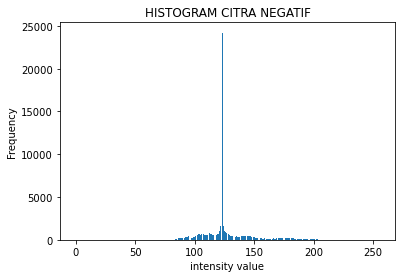

In [49]:
Histogram_Jumlah(keabuan2,ni2,"HISTOGRAM CITRA NEGATIF") #memanggil function Histogram_Jumlah untuk membuat histogram
# dengan input berupa kebauan2,ni2 yang merupakan nilai keabuan dan ni dari negatifImage, serta sebuah title